# Kapittel 9

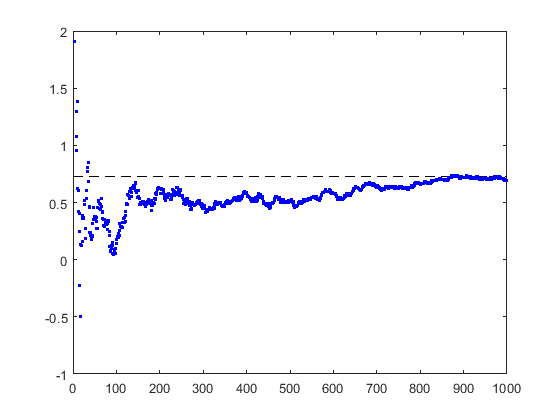

Estimat = 0.6927

In [11]:
% MonteCarloPlott.m

% Skript som estimerer eit integral ved Monte Carlo-metoden
% Sjølve integralet, og den analytiske løysninga av det, er
% spesifisert i starten av skriptet - i tillegg til
% det maksimale talet på trekk.

% Integrasjonsgrenser
a=-1;
b=3;

% Integrand
funk=@(x) x*sin(x^2);

% Kjent analytisk svar:
Fasit=(cos(1)-cos(9))/2;

% Maksimalt tal på trekk:
Nmax=1000;

% Initierer summen
MCsum=0;

% Lagar klart plott for estimata - saman med eksakt svar
plot([1 Nmax],Fasit*[1 1],'k--')
hold on

% Vi utfører uttrekka og legg til summen for kvar gong
for n=1:Nmax
  x=a+(b-a)*rand;
  MCsum=MCsum+funk(x);
  Estimat=(b-a)*MCsum/n;          % Integral-estimat
  plot(n,Estimat,'b.')            % Plottar estimat
end
hold off
axis([0 Nmax -1 2])

% Skriv svaret til skjerm
Estimat


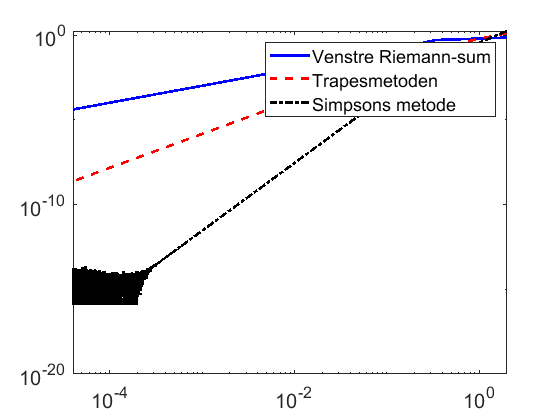

In [27]:
% PlottFeilenInt.m

% Skript som plottar feilen i eit estimat for ein
% Riemann-sum, trapesmetoden og Simpsons metode.

% Spesifiserer integrand, grenser og eksakt svar
funk=@(x) x*sin(x^2);
a=-1; b=3;
Fasit=(cos(1)-cos(9))/2;

% Lagar vektor med n-verdiar
nStart=2;
nSteg=10;
nSlutt=100000;
nVektor=nStart:nSteg:nSlutt;
hVektor=(b-a)./nVektor;

% Lagar vektorar med estimat
indeks=1;
for n=nVektor
  Vvektor(indeks)=RiemannFunkV(funk,a,b,n);
  Tvektor(indeks)=TrapesFunk(funk,a,b,n);
  Svektor(indeks)=SimpsonsFunk(funk,a,b,n);
  indeks=indeks+1;
end

% Plottar feilen
loglog(hVektor,abs(Vvektor-Fasit),'b-','linewidth',2)
hold on
loglog(hVektor,abs(Tvektor-Fasit),'r--','linewidth',2)
loglog(hVektor,abs(Svektor-Fasit),'k-.','linewidth',2)
hold off
set(gca,'fontsize',15)
legend('Venstre Riemann-sum','Trapesmetoden','Simpsons metode')

% RiemannFunkV.m (fra Canvas)

function R=RiemannFunkV(Funk, a, b, N)

% Funksjonsfil som estimerar eit integral som ein 
% Riemann-sum på ein regulær partisjon med venstre-
% seleksjon.
% Integranden og grenser er hard-koda, input er
% N, talet på del-intervall.

% Oppdeling
DeltaX=(b-a)/N;

% Initerar summen:
R=0;

% Reknar ut summen
for n=1:N
  x=a+(n-1)*DeltaX;             % Oppdaterar x
  R=R+DeltaX*Funk(x);           % Oppdaterar summen
end
end

% TrapesFunk.m

function T=TrapesFunk(funk,a,b,n)

% Implementering av trapesmetoden for numerisk integrasjon.
% Integranden funk, grensene a og b, og oppdelinga n
% blir gitt som input.

% Steglengda
h=(b-a)/n;

% Bidrag frå endane
T=h/2*(funk(a)+funk(b));

% Resten av bidraga
for i=1:(n-1)
    xi=a+i*h;
    T=T+h*funk(xi);
end
end

% SimpsonsFunk.m (fra Canvas)

function S=SimpsonsFunk(Funk, a, b, N)

% Funksjonsfil som estimerar eit integral ved
% hjelp av Simpsons metode.
% Integranden og grenser er hard-koda, input er
% N, talet på del-intervall.

% Oppdeling
DeltaX=(b-a)/N;

% Initerar summen og tar med endane:
S=(Funk(a)+Funk(b));

% Oddetalsbidrag
for n=1:2:(N-1)
  x=a+n*DeltaX;                 % Oppdaterar x
  S=S+4*Funk(x);           % Oppdaterar summen
end

% Partalssbidrag
for n=2:2:(N-2)
  x=a+n*DeltaX;                 % Oppdaterar x
  S=S+2*Funk(x);           % Oppdaterar summen
end

% Korrigerar svar med DeltaX/3;
S=S*DeltaX/3;
end


In [28]:
% RektangelSum.m

% Skript som reknar ut ein sum av areal av rektangel

% Talet på rektangel
%n=input('Kor mange rektangel? ');
n=10
% Funksjonen
funk=@(x) x^3;

% Grenser
a=1;
b=3;

% Bestemmer h og initierer summen V
h=(b-a)/n;
V=0;

for i=0:(n-1)
    xi=a+i*h;
    V=V+h*funk(xi);
end

% Skriv summen V til skjerm
V


n = 10

V = 17.4800

In [29]:
% RektangelSumV2.m

% Skript som estimerer eit integral på tre måtar:
% Venstre og høgre Riemann-sum og trapesmetoden

% Talet på rektangel
%n=input('Kor mange rektangel? ');
n=10
% Funksjonen
funk=@(x) x^3;

% Grenser
a=1;
b=3;

% Bestemmer h og initierer summane V og H
h=(b-a)/n;
V=0;
H=0;

% Reknar ut venstresummen
for i=0:(n-1)
    xi=a+i*h;
    V=V+h*funk(xi);
end

% Reknar ut høgresummen
for i=1:n
    xi=a+i*h;
    H=H+h*funk(xi);
end


% Skriv summane V, H og T til skjerm
V
H
T=(V+H)/2                   % Trapessummen


n = 10

V = 17.4800

H = 22.6800

T = 20.0800

In [30]:
% RiemannFunk.m

function V=RiemannFunk(x,y)

% Funksjon som beregner venstre Rimann sum for gitte x- og y-vektorer
% Partisjonen, gitt ved x-vektoren, må være regulær.

% Bestemmer steglengda og antall steg
h=x(2)-x(1);
n=length(x);

% Initierer summen
V=0;

for i=1:(n-1)
    V=V+h*y(i);
end


In [31]:
% RiemannFunkMidt.m

function V=RiemannFunk(x,y)

% Funksjon som beregner venstre Rimann sum for gitte x- og y-vektorer
% Partisjonen, gitt ved x-vektoren, må være regulær.

% Bestemmer steglengda og antall steg
h=x(2)-x(1);
n=length(x);

% Initierer summen
V=0;

for i=1:n
    V=V+h*y(i);
end


In [38]:
% Simpson.m

% Implementering av Simpsons metode.
% Integrasjonsgrensene a og b, oppdelinga n og integranden
% funk blir gitt heilt i toppen av skriptet.
% For å gi oppdelinga n brukar vi input-funksjonen

% Integrasjonsgrensene
a=0;
b=1;

% Integranden
funk=@(x) cos(pi*x);

% Oppdeling (kontrollerer at n er eit partal)
%n=input('Gi oppdelinga n: ');
n=10
if round(n/2) ~= n/2
    disp('n må vere eit partal')
    return
end
h=(b-a)/n;                  % Steglengda

% Bidrag frå endane
S=h/3*(funk(a)+funk(b));

% Oddetalsbidrag:
for i=1:2:(n-1);
    xi=a+i*h;
    S=S+h/3*4*funk(xi);
end

% Partalsbidrag
for i=2:2:(n-2)
    xi=a+i*h;
    S=S+h/3*2*funk(xi);
end

% Skriv svaret til skjerm
S


n = 10

S = 0

In [39]:
% SimpsonFunk.m

function S=SimpsonFunk(x,y)

% Funksjon som beregner integral ved Simpsons metode 
% for gitte x- og y-vektorer
% Partisjonen, gitt ved x-vektoren, må være regulær.

% Bestemmer steglengda og antall steg
h=x(2)-x(1);
n=length(x);

% Ende-bidrag:
S=h/3*(y(1)+y(n));

% Partalls-bidrag
for i=2:2:(n-1)
    S=S+h/3*4*y(i);
end

% Oddetalls-bidrag
for i=3:2:(n-2)
    S=S+h/3*2*y(i);
end


In [40]:
% Trapes.m

% Implementering av trapesmetoden for numerisk integrasjon.
% Integrasjonsgrensene a og b, oppdelinga n og integranden
% funk blir gitt heilt i toppen av skriptet.
% For å gi n brukar vi input-funksjonen.

% Integrasjonsgrenser
a=-1;
b=1;

% Integranden
funk=@(x) x^6;

% Oppdeling
%n=input('Gi oppdelinga n: ');
n=10
h=(b-a)/n;                  % Steglengda

% Bidrag frå endane
T=h/2*(funk(a)+funk(b));

% Resten av bidraga
for i=1:(n-1)
    xi=a+i*h;
    T=T+h*funk(xi);
end

% Skriv svaret til skjerm
T


n = 10

T = 0.3252